In [64]:
import numpy as np
import pandas as pd
import io

# Exploratory Data Analysis

### Uploading data

In [65]:
#import files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
songs = pd.read_csv("songs.csv")
song_extra_info = pd.read_csv("song_extra_info.csv")
members = pd.read_csv("members.csv")

### Exploring the general data structure

In [66]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [67]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [68]:
song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [69]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [70]:
#Checking dataframe's shape
print(f'Train shape: {train.shape}')
print(f'Songs shape: {songs.shape}')
print(f'Song_extra_info shape: {song_extra_info.shape}')
print(f'Members shape: {members.shape}')

Train shape: (7377418, 6)
Songs shape: (2296320, 7)
Song_extra_info shape: (2295971, 3)
Members shape: (34403, 7)


In [71]:
#merge datasets
def merge_data(data):
  data_df = pd.merge(data, songs, on='song_id', how='left')
  data_df = pd.merge(data_df, members, on='msno', how='left')
  data_df = pd.merge(data_df, song_extra_info, on='song_id', how='left')
  return data_df


In [72]:
train_df = merge_data(train)
train_df.shape

(7377418, 20)

In [73]:
test_df = merge_data(test)
test_df.shape

(2556790, 20)

### Data types, missing values, duplicates

In [74]:
#Checking column's datatype
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
 18  name                    object 
 19  isrc                    object 
dtypes: float64(2), int64(6), object(12)
memory usage: 1.1+ GB


In [75]:
#Checking quantity of missing values
train_df.isnull().sum()

msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414804
source_type                 21539
target                          0
song_length                   114
genre_ids                  118455
artist_name                   114
composer                  1675706
lyricist                  3178812
language                      150
city                            0
bd                              0
gender                    2961479
registered_via                  0
registration_init_time          0
expiration_date                 0
name                         1457
isrc                       577858
dtype: int64

In [76]:
# it is easier to work with a percentage ratio
def percentage_ratio(data):
    datatype = pd.DataFrame(data.dtypes,columns=["Data Type"])
    datatype["Missing Values"]=data.isnull().sum()
    datatype["% Missing Values"]=data.isnull().sum()/len(data)*100
    return datatype.sort_values(by="% Missing Values", ascending=False)

In [77]:
percentage_ratio(train_df)

,Data Type,Missing Values,% Missing Values
lyricist,object,3178812,43.088408
gender,object,2961479,40.142486
composer,object,1675706,22.713990
isrc,object,577858,7.832795
source_screen_name,object,414804,5.622618
genre_ids,object,118455,1.605643
source_system_tab,object,24849,0.336825
source_type,object,21539,0.291959
name,object,1457,0.019749
language,float64,150,0.002033


In [78]:
train_df.duplicated().sum()

0

### Processing of missing values

In [79]:
def fill_numeric_types(data, column_name):
    mean_value = data[column_name].mean()
    data[column_name].fillna(mean_value, inplace=True)
    return data

In [80]:
fill_numeric_types(train_df, 'song_length')

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,1,0,NaN,7,20120102,20171005,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,13,24,female,9,20110525,20170911,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,13,24,female,9,20110525,20170911,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,13,24,female,9,20110525,20170911,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,1,0,NaN,7,20120102,20171005,Sleep Without You,QM3E21606003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1,267958.0,1259,Dr. Dre,Andre R. Young| Melvin Charles Bradford| Shawn...,NaN,52.0,4,26,female,9,20041218,20170930,Still D.R.E.,USIR19905031
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0,227404.0,465,R. City feat. Adam Levine,Theron Thomas| Timothy Thomas| Lukasz Gottwald...,Theron Thomas| Timothy Thomas| Lukasz Gottwald...,52.0,1,0,NaN,7,20130627,20171006,Locked Away,USRC11501369
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1,258298.0,465,兄弟本色G.U.T.S. (姚中仁、張震嶽、頑童MJ116),姚中仁 MC HotDog 陳昱榕 Ｅ-SO 周文傑 KENZY 林睦淵,姚中仁 MC HotDog 陳昱榕 Ｅ-SO 周文傑 KENZY 林睦淵,3.0,1,0,NaN,7,20130627,20171006,FLY OUT,TWA451512031
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1,524146.0,2122,Brad Mehldau Trio,NaN,NaN,52.0,5,0,NaN,9,20150213,20170918,Wonderwall,USNO10750721


In [81]:
train_df.isnull().sum()

msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414804
source_type                 21539
target                          0
song_length                     0
genre_ids                  118455
artist_name                   114
composer                  1675706
lyricist                  3178812
language                      150
city                            0
bd                              0
gender                    2961479
registered_via                  0
registration_init_time          0
expiration_date                 0
name                         1457
isrc                       577858
dtype: int64

### Filling in the missing values of categorical features.

In [82]:
def uniq_val(data, culomn):
  unique_val = set(data[culomn].unique())

  return  unique_val

In [83]:
#language

print(f"Unique value in train 'language': {uniq_val(train_df, 'language')}")
print(f"Unique value in test 'language': {uniq_val(test_df, 'language')}")

Unique value in train 'language': {3.0, 38.0, 10.0, 45.0, 17.0, nan, 52.0, 24.0, 59.0, -1.0, 31.0}
Unique value in test 'language': {3.0, 38.0, 10.0, 45.0, 17.0, 52.0, nan, 24.0, 59.0, -1.0, 31.0}


In [84]:
train_df['language'] = train_df['language'].fillna(-1.0)
test_df['language'] = test_df['language'].fillna(-1.0)

In [85]:
#source_system_tab

print(f"Unique value in train 'source_system_tab': {uniq_val(train_df, 'source_system_tab')}")
print(f"Unique value in test 'source_system_tab': {uniq_val(test_df, 'source_system_tab')}")

Unique value in train 'source_system_tab': {'notification', 'listen with', nan, 'settings', 'my library', 'search', 'discover', 'radio', 'explore'}
Unique value in test 'source_system_tab': {'notification', 'listen with', nan, 'settings', 'explore', 'my library', 'discover', 'search', 'radio'}


In [86]:
#source_screen_name

print(f"Unique value in train 'source_screen_name': {uniq_val(train_df, 'source_screen_name')}")
print(f"Unique value in test 'source_screen_name': {uniq_val(test_df, 'source_screen_name')}")

Unique value in train 'source_screen_name': {'Online playlist more', 'Album more', 'Unknown', 'Payment', 'Discover Feature', 'Search Trends', 'Local playlist more', 'Explore', 'Search Home', 'My library_Search', 'Search', 'Discover New', nan, 'My library', 'Others profile more', 'Concert', 'Discover Genre', 'Artist more', 'Discover Chart', 'Self profile more', 'Radio'}
Unique value in test 'source_screen_name': {'Online playlist more', 'Album more', 'Unknown', 'Payment', 'Discover Feature', 'Search Trends', 'Local playlist more', 'Explore', 'Search Home', 'My library_Search', 'Search', 'Discover New', 'People local', nan, 'My library', 'Others profile more', 'Concert', 'Discover Genre', 'Artist more', 'Discover Chart', 'Self profile more', 'Radio', 'People global'}


In [87]:
test_df['source_screen_name'] = test_df['source_screen_name'].replace(["People global", "People local"], 'Unknown')

In [88]:
#source_type

print(f"Unique value in train 'source_type': {uniq_val(train_df, 'source_type')}")
print(f"Unique value in test 'source_type': {uniq_val(test_df, 'source_type')}")

Unique value in train 'source_type': {nan, 'my-daily-playlist', 'local-library', 'song', 'artist', 'local-playlist', 'song-based-playlist', 'top-hits-for-artist', 'topic-article-playlist', 'online-playlist', 'album', 'listen-with', 'radio'}
Unique value in test 'source_type': {nan, 'my-daily-playlist', 'local-library', 'song', 'artist', 'local-playlist', 'song-based-playlist', 'top-hits-for-artist', 'topic-article-playlist', 'online-playlist', 'album', 'listen-with', 'radio'}


In [89]:
#gender

print(f"Unique value in train 'gender': {uniq_val(train_df, 'gender')}")
print(f"Unique value in test 'gender': {uniq_val(test_df, 'gender')}")

Unique value in train 'gender': {'female', 'male', nan}
Unique value in test 'gender': {'female', 'male', nan}


In [90]:
def unknown_mis_val(data):
  object_culomns = data.select_dtypes(include=['object']).columns.tolist()

  for culomn in object_culomns:
    data[culomn] = data[culomn].fillna("Unknown")
  return data

In [91]:
unknown_mis_val(train_df)
unknown_mis_val(test_df)

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,224130.0,458,梁文音 (Rachel Liang),Qi Zheng Zhang,Unknown,3.0,1,0,Unknown,7,20160219,20170918,愛其實很殘忍,TWUM71400047
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,320470.0,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,3.0,1,0,Unknown,7,20160219,20170918,她說,TWB671005201
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,Unknown,song-based-playlist,315899.0,2022,Yu Takahashi (高橋優),Yu Takahashi,Yu Takahashi,17.0,1,0,Unknown,4,20161117,20161124,subarashiki nichijo,JPWP01070260
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,Unknown,52.0,3,30,male,9,20070725,20170430,Hold Me| Thrill Me| Kiss Me| Kill Me,GBAAN0201228
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,197590.0,873,Yoga Mr Sound,Neuromancer,Unknown,-1.0,3,30,male,9,20070725,20170430,Om Yoga,ITO101121898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556785,2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist,247640.0,1609,The Chainsmokers & Coldplay,Andrew Taggart| Christopher Martin| Will Champ...,Andrew Taggart| Christopher Martin| Will Champ...,52.0,13,41,female,9,20101126,20170921,Something Just Like This,USQX91700278
2556786,2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,Unknown,online-playlist,197067.0,458,郭美美 (Jocie Guo),小路,小路,3.0,13,24,male,9,20140506,20170912,一百種孤獨的理由,CNZ171601130
2556787,2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,Unknown,online-playlist,212950.0,458,問樂團 (Guess What),Skot Suyama陶山/Linkin Park,陳天佑/謝和弦/Linkin Park,3.0,13,24,male,9,20140506,20170912,愛不需要裝乖 / Somewhere I Belong,TWCE31600005
2556788,2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,Unknown,online-playlist,164414.0,465,陳冠宇 (Kaiel Chen),Unknown,Unknown,3.0,13,24,male,9,20140506,20170912,陳冠宇 (Kuan Yu Chen),TWN711700010


In [92]:
percentage_ratio(train_df)

,Data Type,Missing Values,% Missing Values
msno,object,0,0.0
song_id,object,0,0.0
name,object,0,0.0
expiration_date,int64,0,0.0
registration_init_time,int64,0,0.0
registered_via,int64,0,0.0
gender,object,0,0.0
bd,int64,0,0.0
city,int64,0,0.0
language,float64,0,0.0


# Identification of relationships and correlations between variables

### Let's select the relevant values of the features that will help with further analysis.

In [93]:
def age_category(age):
  if type(age) == int:
    if 0<=age<=24:
      return 'до 25 лет'
    elif 25<=age<=44:
      return '25-44 года'
    elif 45<=age<=59:
      return '45-59 лет'
    elif 60<=age:
      return 'больше 60 лет'
    else:
      return np.nan
  else:
    return np.nan

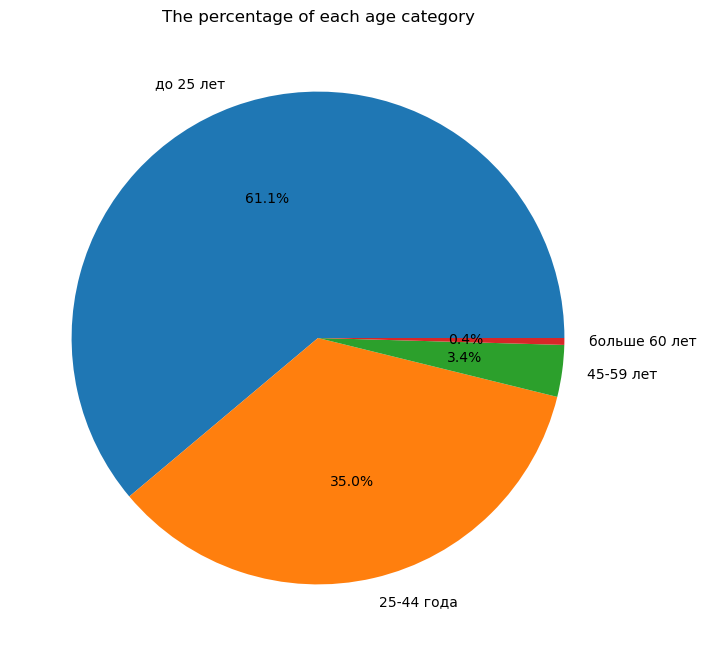

In [94]:
import matplotlib.pyplot as plt

train_df.loc[:,'age_category'] = train_df['bd'].apply(age_category)
train_df = train_df.dropna(subset=['age_category'])

age_category_counts = train_df['age_category'].value_counts()

# Building a pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_category_counts, labels=age_category_counts.index, autopct='%1.1f%%')
plt.title('The percentage of each age category')
plt.show()

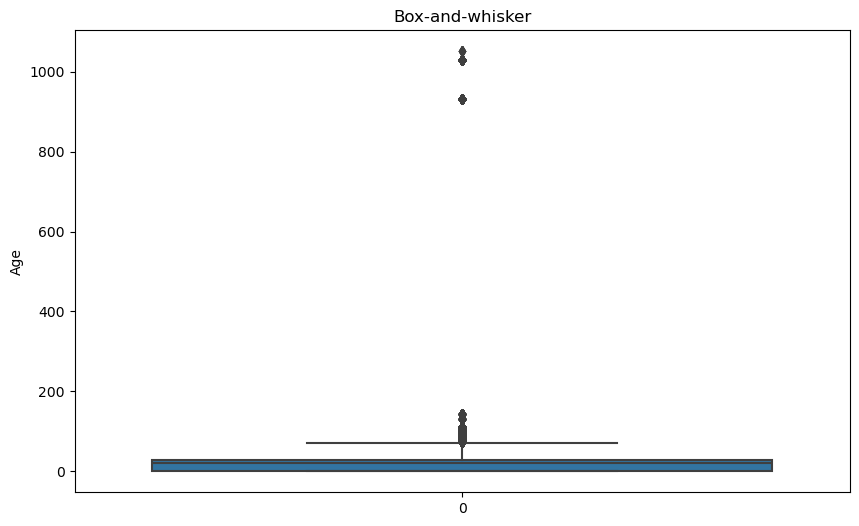

In [95]:
#Let's look at the number of emissions
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data = train_df['bd'])
plt.title('Box-and-whisker')
plt.ylabel('Age')
plt.show()

In [96]:
#handling emissions

def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    df.loc[:, column] = df[column].fillna(df[column].mean())
    return df

In [97]:
train_df = remove_outliers(train_df, "bd")

In [98]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7367732 entries, 0 to 7377417
Data columns (total 21 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
 18  name                    object 
 19  isrc                    object 
 20  age_category            object 
dtypes: float64(2), int64(6), object(13)


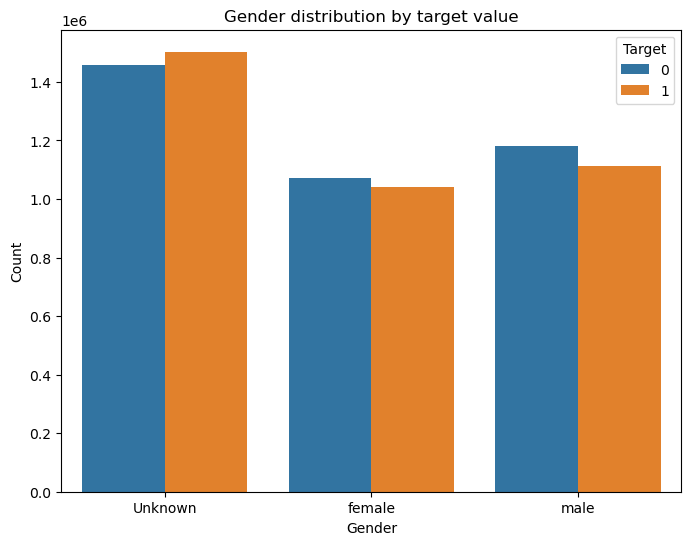

In [99]:
#Gender distribution by target value
train_df['target'] = train_df['target'].astype(str)

plt.figure(figsize=(8, 6))
sns.countplot(x="gender", hue="target", data=train_df)
plt.title('Gender distribution by target value')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Target', labels=['0', '1']) 
plt.show()

### Encoding data

In [100]:
from sklearn.preprocessing import LabelEncoder

#Converting categorical values to numeric values
def Encoder(data):
    object_columns = data.select_dtypes(include=['object']).columns.tolist()
    le = LabelEncoder()

    for column in object_columns:
        data[column] = le.fit_transform(data[column])

    return data

In [101]:
train_df = Encoder(train_df)

In [102]:
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,language,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc,age_category
0,8148,74638,2,7,7,1,206471.0,285,3274,14579,...,52.0,1,0,0,7,20120102,20171005,51424,65218,3
1,17237,223381,4,8,5,1,284584.0,90,31939,60942,...,52.0,13,24,1,9,20110525,20170911,81266,195575,3
2,17237,120699,4,8,5,1,225396.0,90,21361,45051,...,52.0,13,24,1,9,20110525,20170911,57280,253514,3
3,17237,23686,4,8,5,1,255512.0,6,27419,36695,...,-1.0,13,24,1,9,20110525,20170911,34712,65546,3
4,8148,33279,2,7,7,1,187802.0,2,4468,8484,...,52.0,1,0,0,7,20120102,20171005,121752,131876,3


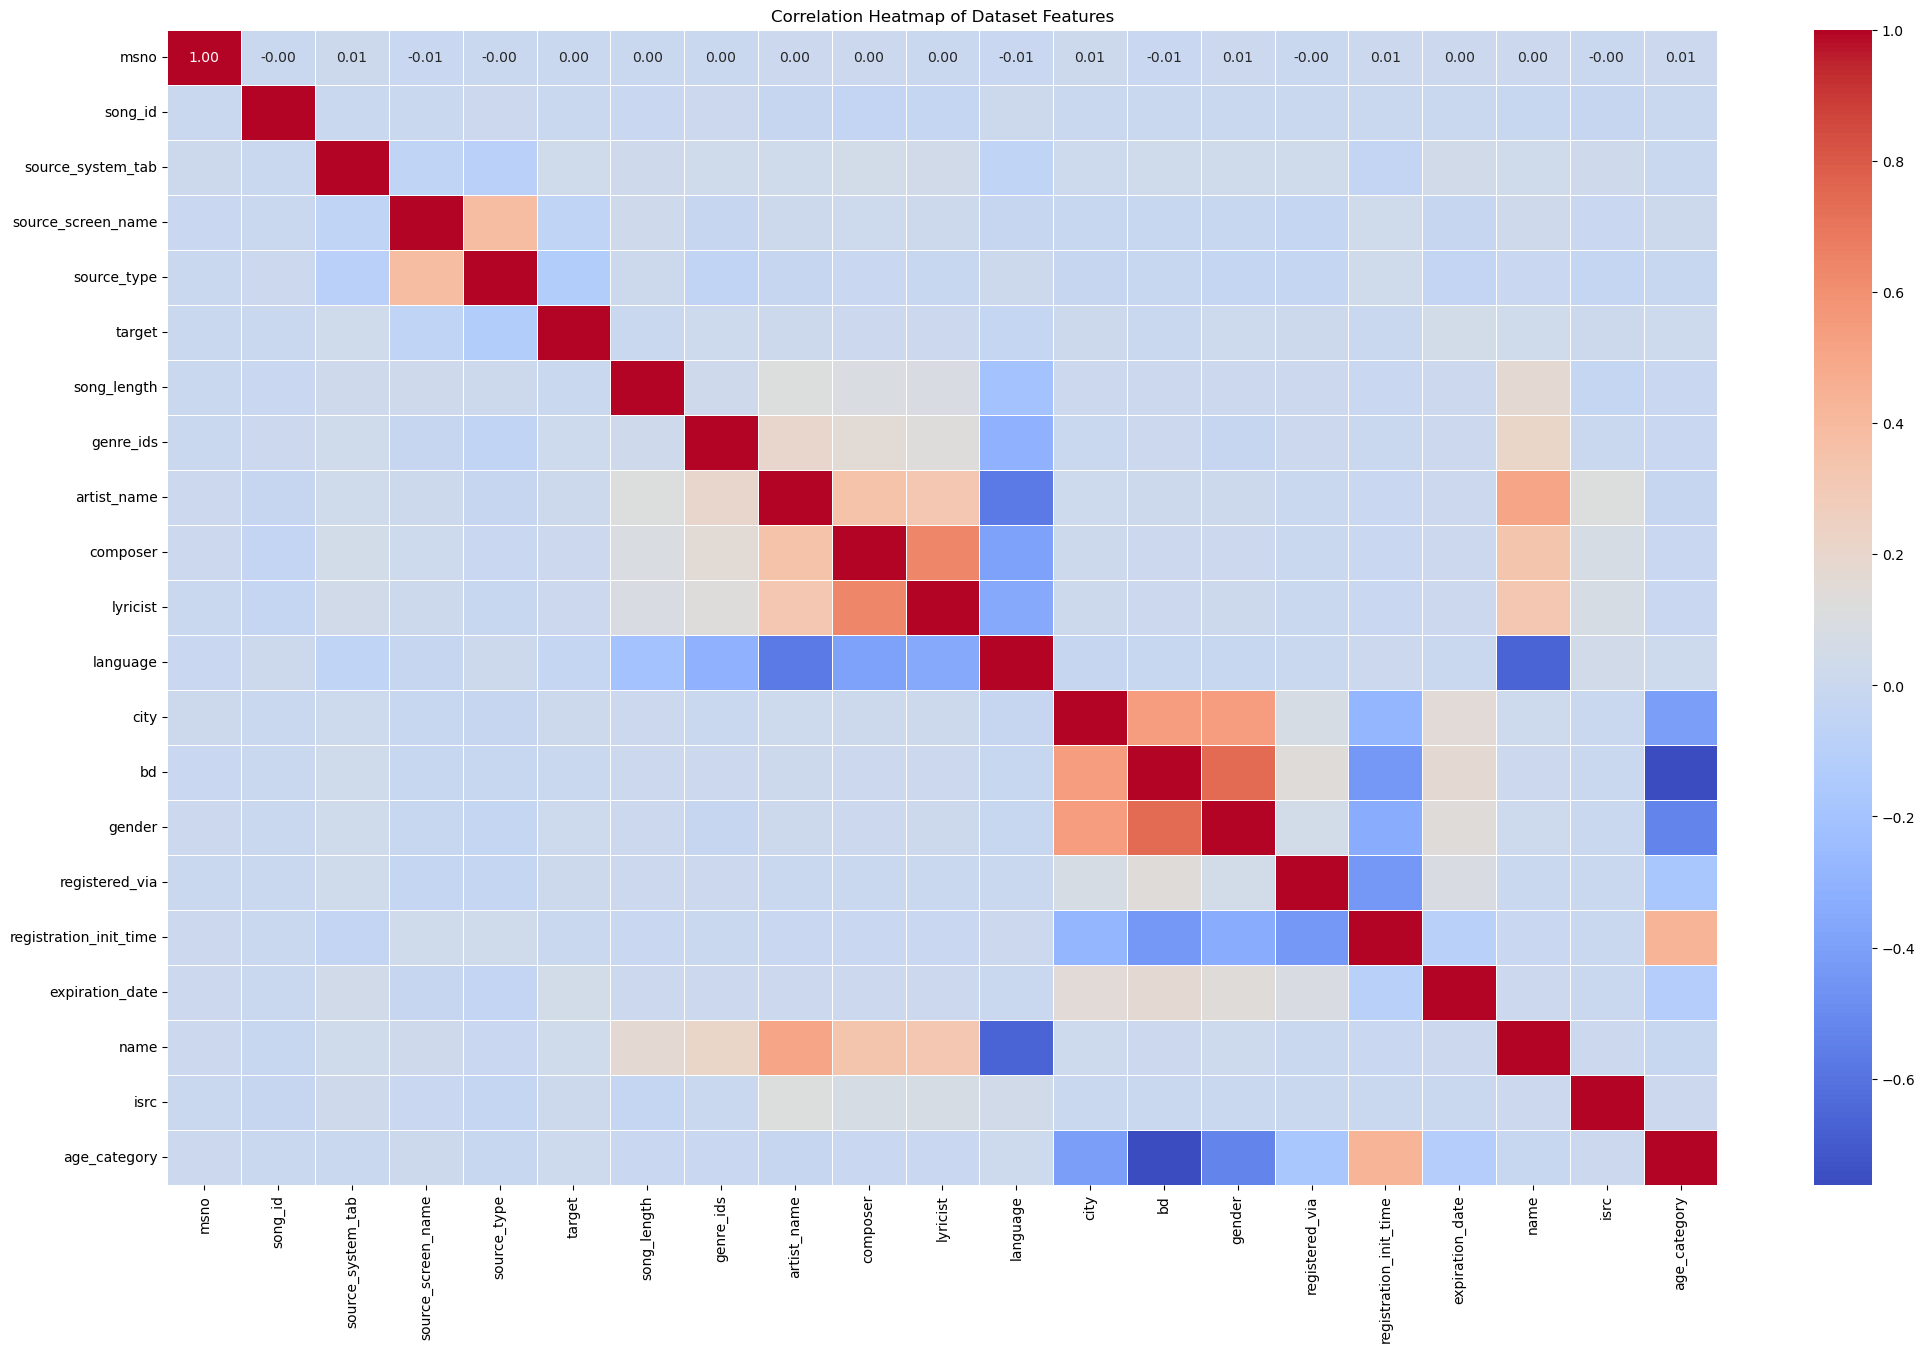

In [103]:
#Let's build a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = train_df.corr()

plt.figure(figsize=(25, 15))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap of Dataset Features')
plt.show()

In [104]:
#Drop Unnecessary features
features = ['language', 'lyricist', 'name', 'gender', 'source_screen_name', 'composer']
for feature in features:
    train_df = train_df.drop(columns=feature)
    test_df = test_df.drop(columns=feature)

print(train_df.head())

    msno  song_id  source_system_tab  source_type  target  song_length  \
0   8148    74638                  2            7       1     206471.0   
1  17237   223381                  4            5       1     284584.0   
2  17237   120699                  4            5       1     225396.0   
3  17237    23686                  4            5       1     255512.0   
4   8148    33279                  2            7       1     187802.0   

   genre_ids  artist_name  city  bd  registered_via  registration_init_time  \
0        285         3274     1   0               7                20120102   
1         90        31939    13  24               9                20110525   
2         90        21361    13  24               9                20110525   
3          6        27419    13  24               9                20110525   
4          2         4468     1   0               7                20120102   

   expiration_date    isrc  age_category  
0         20171005   65218           

# Split inputs and targets

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = train_df.drop("target",axis=1)
y = train_df.target

#create test set and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Standartize inputs
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

#Standartize test inputs
X_test_scaled = scaler.transform(X_test)

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def conf_matrix(y_test, y_test_pred):
    M = confusion_matrix(y_test, y_test_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=M)
    cm_display.plot()
    plt.show()
    

In [107]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def score(X_train, y_train, model):
  return model.score(X_train, y_train)

def clas_report(y_test, y_pred):
  return classification_report(y_test, y_pred)

def accur(y_test, y_pred):
  return round(accuracy_score(y_test, y_pred), 8)

# Logistic regression

In [108]:
from sklearn.metrics import ndcg_score
from sklearn.linear_model import LogisticRegression

# Fit logistic regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train_scaled, y_train)

y_test_pred = logreg.predict(X_test_scaled)

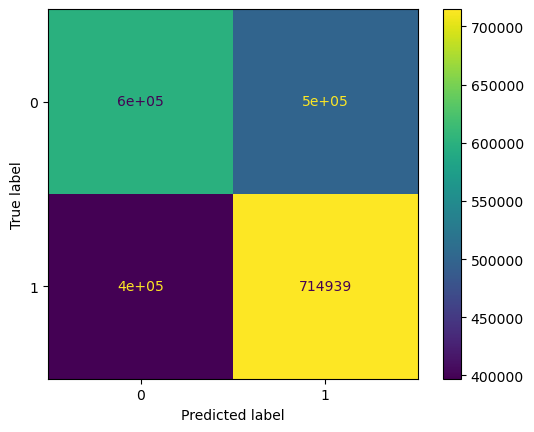

In [109]:
log_conf_matrix = conf_matrix(y_test,y_test_pred)

In [110]:
print(f"Train score: {score(X_train_scaled, y_train, logreg)}")
print(f"Test score: {score(X_test_scaled, y_test, logreg)}")

Train score: 0.5939193921292307
Test score: 0.594467316949582


In [111]:
print(f"Classification reports: {clas_report(y_test, y_test_pred)}")

Classification reports:               precision    recall  f1-score   support

           0       0.60      0.55      0.57   1098191
           1       0.59      0.64      0.61   1112129

    accuracy                           0.59   2210320
   macro avg       0.60      0.59      0.59   2210320
weighted avg       0.60      0.59      0.59   2210320



In [112]:
print(f"Accuracy: {accur(y_test,y_test_pred)}")

Accuracy: 0.59446732


# Random forest

In [113]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'gini', random_state=42)
tree.fit(X_train_scaled, y_train)

y_test_tree_pred = tree.predict(X_test_scaled)

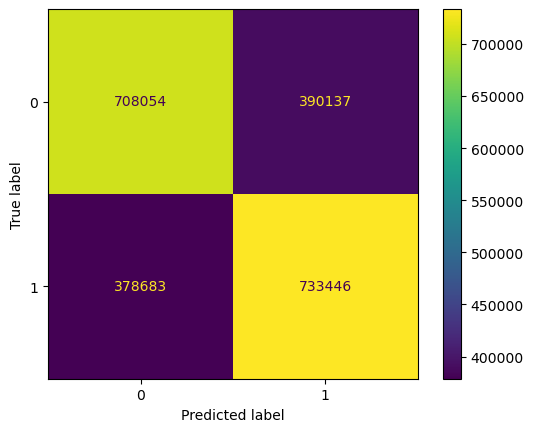

In [114]:
tree_conf_matrix = conf_matrix(y_test,y_test_tree_pred)

In [115]:
print(f"Train score: {score(X_train_scaled, y_train, tree)}")
print(f"Test score: {score(X_test_scaled, y_test, tree)}")

Train score: 1.0
Test score: 0.6521680118715842


In [116]:
print(f"Classification reports: {clas_report(y_test, y_test_tree_pred)}")

Classification reports:               precision    recall  f1-score   support

           0       0.65      0.64      0.65   1098191
           1       0.65      0.66      0.66   1112129

    accuracy                           0.65   2210320
   macro avg       0.65      0.65      0.65   2210320
weighted avg       0.65      0.65      0.65   2210320



In [117]:
print(f"Accuracy: {accur(y_test,y_test_tree_pred)}")

Accuracy: 0.65216801


In [118]:
percentage_ratio(test_df)

,Data Type,Missing Values,% Missing Values
song_length,float64,25,0.000978
id,int64,0,0.000000
msno,object,0,0.000000
song_id,object,0,0.000000
source_system_tab,object,0,0.000000
source_type,object,0,0.000000
genre_ids,object,0,0.000000
artist_name,object,0,0.000000
city,int64,0,0.000000
bd,int64,0,0.000000


In [119]:
test_df.duplicated().sum()

0

In [120]:
fill_numeric_types(test_df, 'song_length')

,id,msno,song_id,source_system_tab,source_type,song_length,genre_ids,artist_name,city,bd,registered_via,registration_init_time,expiration_date,isrc
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,local-library,224130.0,458,梁文音 (Rachel Liang),1,0,7,20160219,20170918,TWUM71400047
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,local-library,320470.0,465,林俊傑 (JJ Lin),1,0,7,20160219,20170918,TWB671005201
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,song-based-playlist,315899.0,2022,Yu Takahashi (高橋優),1,0,4,20161117,20161124,JPWP01070260
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,radio,285210.0,465,U2,3,30,9,20070725,20170430,GBAAN0201228
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,radio,197590.0,873,Yoga Mr Sound,3,30,9,20070725,20170430,ITO101121898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556785,2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,online-playlist,247640.0,1609,The Chainsmokers & Coldplay,13,41,9,20101126,20170921,USQX91700278
2556786,2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,online-playlist,197067.0,458,郭美美 (Jocie Guo),13,24,9,20140506,20170912,CNZ171601130
2556787,2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,online-playlist,212950.0,458,問樂團 (Guess What),13,24,9,20140506,20170912,TWCE31600005
2556788,2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,online-playlist,164414.0,465,陳冠宇 (Kaiel Chen),13,24,9,20140506,20170912,TWN711700010


In [121]:
test_df = Encoder(test_df)

In [122]:
#Standartize inputs
scaler = StandardScaler().fit(test_df)
test_scaled = scaler.transform(test_df)

#Standartize test inputs
test_scaled = scaler.transform(test_df)

In [123]:
Y = tree.predict(test_scaled)
print(Y)

[1 0 1 ... 0 0 0]


In [146]:
probabilities = tree.predict_proba(test_scaled)[:, 1]
sorted_indices = np.argsort(probabilities)[::-1]
sorted_probabilities = probabilities[sorted_indices]

In [160]:
def ndcg_score(Y, probabilities, k=20):
    order = np.argsort(probabilities)[::-1]  
    #getting the actual labels for the first examples
    Y = np.take(Y, order[:k])  
    gains = 2 ** Y - 1

    discounts = np.log2(np.arange(len(Y)) + 2)
    return np.sum(gains / discounts) / dcg_score(Y, probabilities, k, gains)


def dcg_score(Y, probabilities, k=20, gains=None):
    order = np.argsort(probabilities)[::-1]
    Y = np.take(Y, order[:k])

    if gains is None:
        raise ValueError("Invalid gains option.")

    discounts = np.log2(np.arange(len(Y)) + 2)
    return np.sum(gains / discounts)

In [161]:
print(ndcg_score(Y, probabilities, k=20))

1.0
